## Analiza skupa podataka *Diamonds*


Ukratko o skupu podataka:
 Skup podataka sadrzi fizicke atribute i cene 53940 dijamanata.

 Atributi (10):  

>* price: Cena u US dolarima.   (326 USD--18,823 USD)  
>* carat: Tezina dijamanta.   (0.2--5.01)  
>* cut: Kvalitet reza.   (Fair, Good, Very Good, Premium, Ideal)  
>* color: Boja dijamanta.   od D (najbolje) do J (najgore)  
>* clarity: Cistoca dijamanta.   (I1 (najgore), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (najbolje))  
>* x: Duzina u mm.   (0--10.74)  
>* y: Sirina u mm.   (0--58.9)  
>* z: Dubina mm. depth in mm   (0--31.8)  
>* depth: 100 * z / mean(x, y).   (43--79)   
>* table: Sirina vrha dijamanta u odnosu na najsiru tacku.   (43--95)  

Homepage: https://ggplot2.tidyverse.org/reference/diamonds.html

Source code: tfds.structured.diamonds.Diamonds  
Versions: 1.0.0 (default): Initial release.  
Download size: 2.64 MiB  
Dataset size: 13.01 MiB  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from IPython import display

In [ ]:
ds = tfds.load('diamonds', split='all')
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_PrefetchDataset element_spec={'features': {'carat': TensorSpec(shape=(), dtype=tf.float32, name=None), 'clarity': TensorSpec(shape=(), dtype=tf.int64, name=None), 'color': TensorSpec(shape=(), dtype=tf.int64, name=None), 'cut': TensorSpec(shape=(), dtype=tf.int64, name=None), 'depth': TensorSpec(shape=(), dtype=tf.float32, name=None), 'table': TensorSpec(shape=(), dtype=tf.float32, name=None), 'x': TensorSpec(shape=(), dtype=tf.float32, name=None), 'y': TensorSpec(shape=(), dtype=tf.float32, name=None), 'z': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'price': TensorSpec(shape=(), dtype=tf.float32, name=None)}>


In [ ]:
data = tfds.as_dataframe(ds)
type(data)

tensorflow_datasets.core.as_dataframe.StyledDataFrame

In [ ]:
diamonds = pd.DataFrame(data)
diamonds

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0


In [ ]:
diamonds.describe()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.051020,2.594197,2.904097,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799805
std,0.474011,1.647136,1.701105,1.116600,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439697
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,3.000000,3.000000,3.000000,61.799999,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,4.000000,4.000000,4.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,7.000000,6.000000,4.000000,79.000000,95.000000,10.740000,58.900002,31.799999,18823.000000


Imena atributa imaju prefiks "features/" sto je nepotrebno. To cemo izbaciti.

In [ ]:
old_feature_names = diamonds.columns.to_list()
old_feature_names

['features/carat',
 'features/clarity',
 'features/color',
 'features/cut',
 'features/depth',
 'features/table',
 'features/x',
 'features/y',
 'features/z',
 'price']

In [ ]:
def rename_features(features):

  features.remove('price')
  new_features = []
  for f in features:
    new_features.append(f[9:])
  new_features.append('price')

  return new_features

  

In [ ]:
feature_names = rename_features(old_feature_names)
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'price']

In [ ]:
diamonds.columns = feature_names
diamonds.head()

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Moze se primetiti da kolone *clarity*, *color* i *cut* imaju brojne vrednosti, a u pitanju su kategoricki atributi, kao sto pise u opisu podataka sa sajta: https://ggplot2.tidyverse.org/reference/diamonds.html

In [ ]:
diamonds['clarity'].value_counts()

2    13065
3    12258
1     9194
4     8171
5     5066
6     3655
7     1790
0      741
Name: clarity, dtype: int64

In [ ]:
diamonds['color'].value_counts()

3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64

In [ ]:
diamonds['cut'].value_counts()

4    21551
3    13791
2    12082
1     4906
0     1610
Name: cut, dtype: int64

Primecujemo da je kodiranje kategorickih vrednosti vec odradjeno i da brojevi reprezentuju redom: 
- *Clarity* od 0 do 7 za redom [I1 (najgore), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (najbolje)]   
- *Cut* od 0 do 4 za redom [Fair, Good, Very Good, Premium, Ideal]  
- *Color* od 0 do 6 (*pogledati sliku ispod*)  

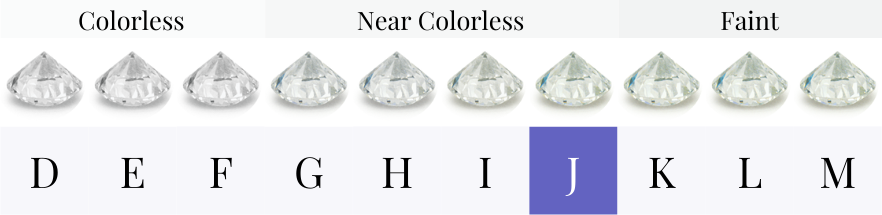

In [ ]:
diamonds.isna().any()

carat      False
clarity    False
color      False
cut        False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

Skup podataka ne sadrzi nedostajuce vrednosti

In [ ]:
diamonds.corr()

,carat,clarity,color,cut,depth,table,x,y,z,price
carat,1.000000,-0.352841,0.291437,-0.134967,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
clarity,-0.352841,1.000000,0.025631,0.189175,-0.067384,-0.160327,-0.371999,-0.358420,-0.366952,-0.146800
color,0.291437,0.025631,1.000000,-0.020519,0.047279,0.026465,0.270287,0.263584,0.268227,0.172511
cut,-0.134967,0.189175,-0.020519,1.000000,-0.218055,-0.433405,-0.125565,-0.121462,-0.149323,-0.053491
depth,0.028224,-0.067384,0.047279,-0.218055,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.160327,0.026465,-0.433405,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.371999,0.270287,-0.125565,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.358420,0.263584,-0.121462,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,-0.366952,0.268227,-0.149323,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.146800,0.172511,-0.053491,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


Na osnovu podataka matrice korelacije, jasno se uocava da je potrebno izvrsiti standardizaciju  

## Vizuelizacija skupa podataka i zanimljive statistike

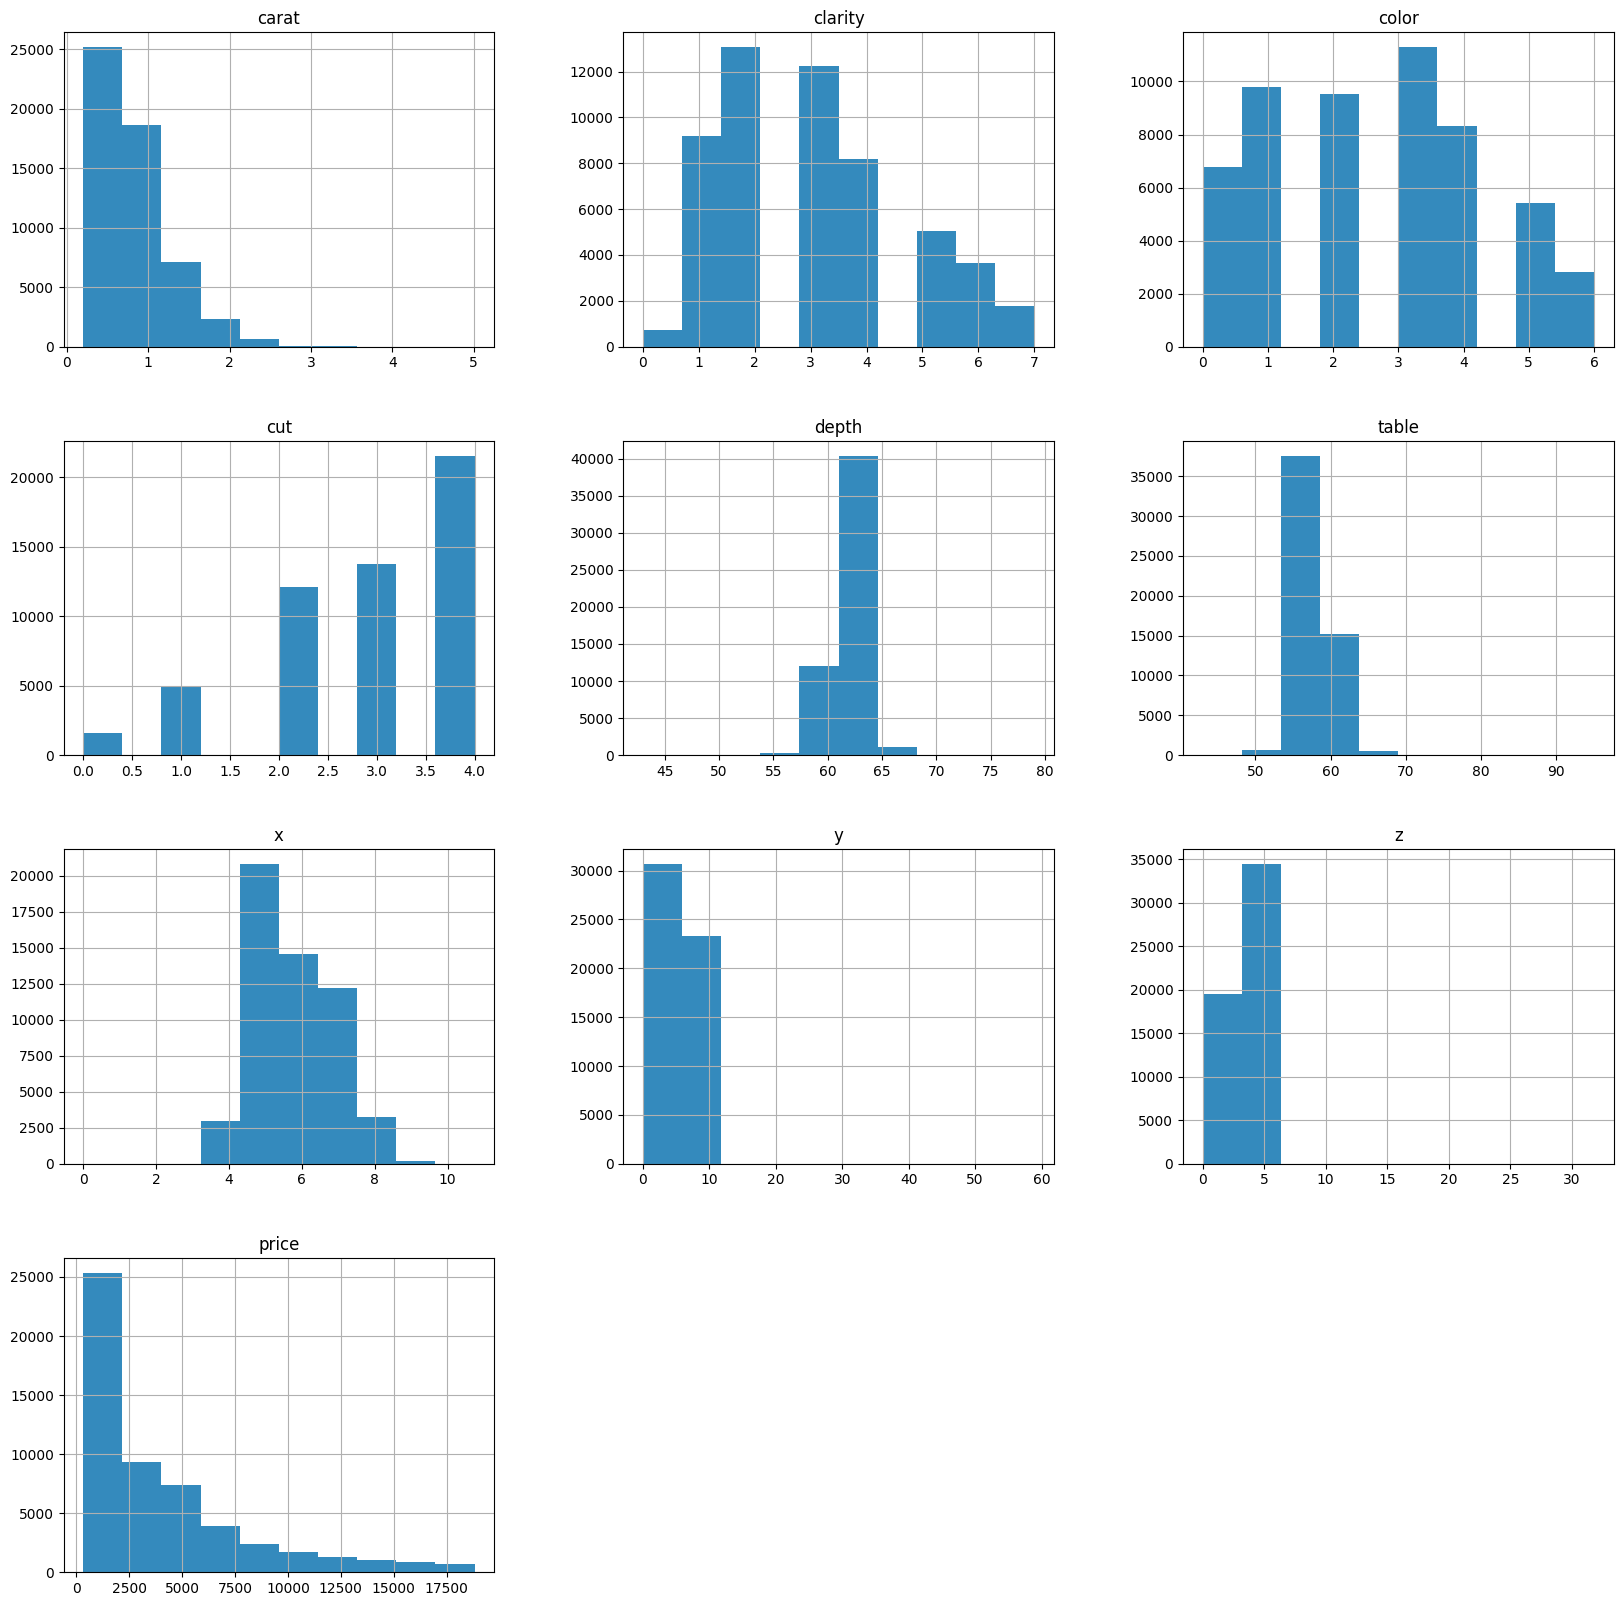

In [ ]:
_ = pd.DataFrame.hist(diamonds, column = diamonds.columns, figsize= (20, 20), color= '#348abd')

In [ ]:
cutClasses = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
pieData = diamonds['cut'].value_counts().sort_index(ascending = False)
pieData

4    21551
3    13791
2    12082
1     4906
0     1610
Name: cut, dtype: int64

In [ ]:
cutClasses.reverse()
cutClasses

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

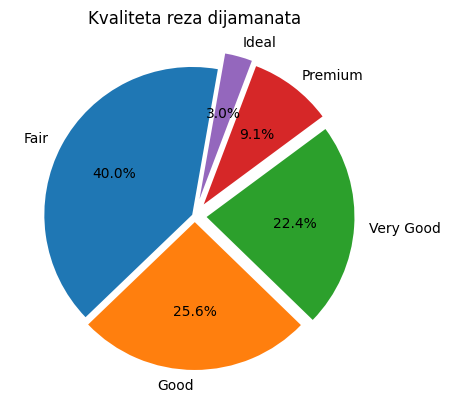

In [ ]:
plt.pie(pieData, labels = cutClasses, startangle= 80, autopct= '%.1f%%', explode = [0.02, 0.04, 0.08, 0.1, 0.12])
plt.title('Kvaliteta reza dijamanata')
plt.show()

Odnos cene i tezine dijamanata po kvalitetu reza:

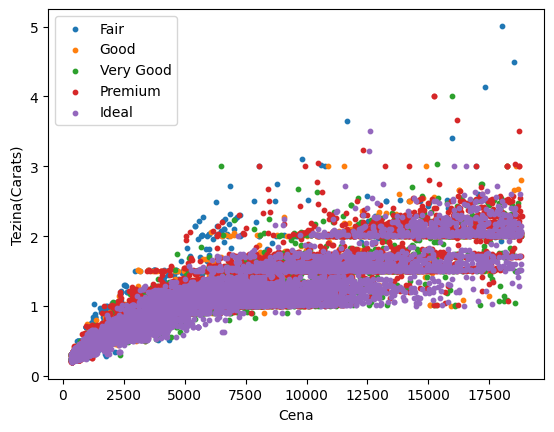

In [ ]:
for cutClass in cutClasses:
  c = diamonds.loc[diamonds['cut'] == cutClasses.index(cutClass)]
  plt.scatter(c['price'], c['carat'], s= 10, label= cutClass)
plt.xlabel('Cena')
plt.ylabel('Tezina(Carats)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
diamonds.groupby(['cut']).price.agg([min, max]).sort_index(ascending= False)

,min,max
cut,,
4,326.0,18806.0
3,326.0,18823.0
2,336.0,18818.0
1,327.0,18788.0
0,337.0,18574.0


Moze se uociti da kvalitet reza ne utice toliko na cenu, sto se takodje vidi iz matrice korelacije

### Posto ovaj skup podataka spada u regresione probleme nadgledanog ucenja, kako bismo ga sveli na klasifikacioni problem, atribut *price* cemo svesti sa numericke promenljive na kategoricku:  
Imacemo 4 kategorije po opsegu cena (u USD):  
1. [0, 5000] 
2. (5000, 10000]
3. (10000, 15000]
4. 15000+

In [ ]:
priceClasses = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
classColumn = []
d = diamonds['price']
for i in d:
  if i >= 0 and i <= 5000:
    classColumn.append(priceClasses[0])
  elif i <= 10000:
    classColumn.append(priceClasses[1])
  elif i <= 15000:
    classColumn.append(priceClasses[2])
  elif i > 15000:
    classColumn.append(priceClasses[3])
  

In [ ]:
s = pd.Series(classColumn)
diamonds['class'] = s
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price,class
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0,"(5000, 10000]"
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0,"[0, 5000]"
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0,"[0, 5000]"
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0,"(5000, 10000]"
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0,"[0, 5000]"
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0,"[0, 5000]"
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0,"[0, 5000]"
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0,"[0, 5000]"


In [ ]:
diamonds['class'].value_counts()

[0, 5000]         39226
(5000, 10000]      9492
(10000, 15000]     3567
15000+             1655
Name: class, dtype: int64

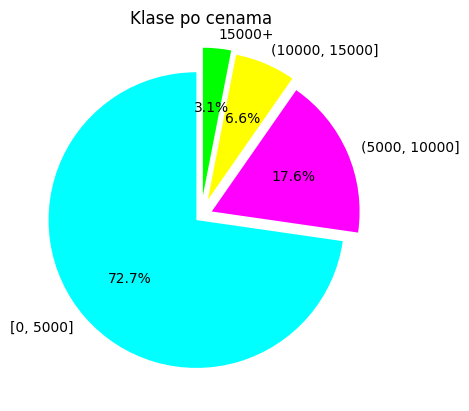

In [ ]:
pieData = diamonds['class'].value_counts().sort_values(ascending= False)
plt.pie(pieData, labels= priceClasses, colors=['cyan', 'magenta', 'yellow', 'lime'], autopct= '%.1f%%', startangle= 90, explode= [0.04, 0.08, 0.12, 0.14])
plt.title('Klase po cenama')
plt.show()

Mozemo uvideti da su klase poprilicno neuravnotezene